In [ ]:
# https://datascienceschool.net/02%20mathematics/03.05%20PCA.html#id3
# 3. 고급 선형대수 > 3.5 PCA

N 개의 M차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가진다. 하지만 이러한 데이터 간의 변이(variation)는 무작위가 아니라 특정한 규칙에 의해 만들어지는 경우가 있다. 예를 들어 붓꽃의 꽃받침 길이는 꽃마다 다르지만 꽃받침 길이가 약 2배 커지면 꽃받침 폭도 약 2배 커지는 것이 일반적이다. 이러한 데이터 간의 변이 규칙을 찾아낼 때 PCA를 이용할 수 있다.  
<br>
PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)**라고도 한다. 더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터값 변화를 설명할 수 있다는 것은 얼핏 보기에 복잡해 보이는 고차원 데이터의 변이를 몇 가지 원인으로 설명할 수 있다는 뜻이다.  


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_

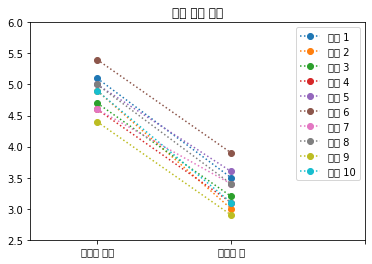

In [3]:
# 붓꽃 데이터의 차원축소
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

In [16]:
# 두 번째 그래프는 가로축을 꽃받침 길이, 세로축을 꽃받침 폭으로 하는 스캐터 플롯으로 나타낸 것이다. 데이터를 나타내는 점들이 양의 기울기를 가지기 때문에 여기에서도 마찬가지로 꽃받침 길이가 크면 꽃받침 폭도 같이 커진다는 규칙을 알 수 있다.  
print(X)

import seaborn as sns 
import pandas as pd

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

<Figure size 576x576 with 0 Axes>

바로 측정되지는 않지만 측정된 데이터의 기저에 숨어서 측정 데이터를 결정짓는 데이터를 **잠재변수(latent variable)**이라고 부른다.  

PCA에서는 잠재변수와 측정 데이터가 선형적인 관계로 연결되어 있다고 가정한다. 즉, i번째 표본의 측정 데이터 벡터 xi의 각 원소를 선형조합하면 그 뒤에 숨은 i번째 표본의 잠재변수 ui의 값을 계산할 수 있다고 가정한다. 이를 수식으로 나타내면 다음과 같다.  

\begin{align}
u_i = w^Tx_i
\tag{3.5.1}
\end{align}  
  
\begin{align}
u_i = w_1 x_{i,1} + w_2 x_{i,2}
\tag{3.5.2}
\end{align}  
  

# 차원축소와 투영

N 개의 데이터를 1차원 직선에 투영하는 문제라고 하면 원점을 지나는 직선을 찾는게 아니라 원점이 아닌 어떤 점 x0을 지나는 직선을 찾는 문제로 바꾼 것이다.  

=> x0 는 데이터 벡터 x1,x2,⋯,xN의 평균벡터이고 w1,w2,⋯,wK는 가장 큰 K개의 특잇값에 대응하는 오른쪽 특이벡터 v1,v2,⋯,vK이다.  

# PCA의 수학적 설명
M  차원의 데이터 x가 N개 있으면 이 데이터는 특징 행렬 X∈RN×M로 나타낼 수 있다. 이 데이터를 가능한 한 쓸모 있는 정보를 유지하면서 더 적은 차원인 K(K<M) 차원의 차원축소 벡터 x^으로 선형변환하고자 한다. 예를 들면 3차원 상의 데이터 집합을 2차원 평면에 투영하여 새로운 데이터 집합을 만들 때 어떤 평면을 선택해야 원래의 데이터와 투영된 데이터가 가장 차이가 적을까? 이 평면을 찾는 문제와 같다.   
  
이 문제는 랭크-K 근사문제이므로 W는 가장 큰 𝐾 개의 특잇값에 대응하는 오른쪽 특이벡터로 만들어진 행렬이다.  




In [17]:
# 사이킷런의 PCA 기능

# 사이킷런의 decomposition 서브패키지는 PCA 분석을 위한 PCA 클래스를 제공한다. 사용법은 다음과 같다.
# 입력 인수:
# n_components : 정수
# 메서드:
# fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
# inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀
# 속성:
# mean_ : 평균 벡터
# components_ : 주성분 벡터

#다음 코드는 붓꽃 데이터를 1차원으로 차원축소(근사)하는 예제 코드다.
#fit_transform() 메서드로 구한 X_low는 1차원 근사 데이터의 집합이다. 이 값을 다시 inverse_transform() 메서드에 넣어서 구한 X2는 다시 2차원으로 복귀한 근사 데이터의 집합이다

from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

<Figure size 504x504 with 0 Axes>

In [22]:
print(pca1.mean_) # 평균
print(pca1.components_) #단위기저벡터는 

#특이벡터
import numpy as np
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
print(VT)
print(VT[:, 0])

#고유값 분해를 할 때는 넘파이가 고유값의 순서에 따른 정렬을 해주지 않으므로 사용자가 정렬해야 한다.
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)
print(W)
print(V)

[4.86 3.31]
[[0.68305029 0.73037134]]
[[-0.68305029 -0.73037134]
 [-0.73037134  0.68305029]]
[-0.68305029 -0.73037134]
[0.17107711 1.44192289]
[[-0.73037134 -0.68305029]
 [ 0.68305029 -0.73037134]]


In [25]:
# 예를 들어 8번째 꽃의 꽃받침 길이와 꽃받침 폭은 다음과 같다.
print(X[7, :])
#PCA로 구한 주성분의 값 즉, 꽃의 크기는 다음과 같다.
print(X_low[7])
print(pca1.components_ @ (X[7, :] - pca1.mean_))

#이 주성분의 값을 이용하여 다시 2차원 값으로 나타낸 근사값은 다음과 같다.
print(X2[7, :])

[5.  3.4]
[0.16136046]
[0.16136046]
[4.97021731 3.42785306]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44404 missing from current font.
  font.set_

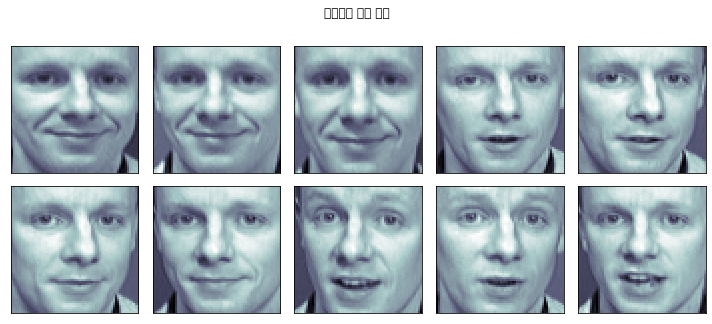

In [26]:
# 이미지 PCA
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

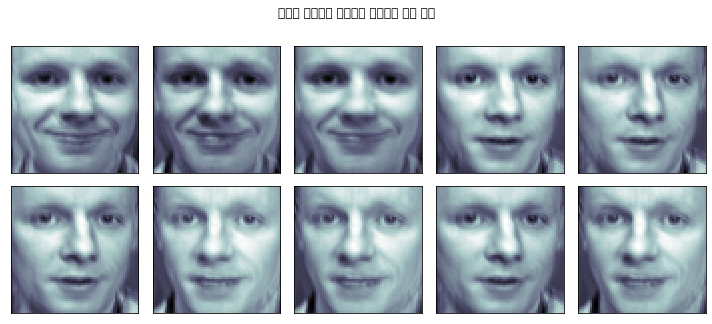

In [28]:
# 이 사진을 주성분이 2개인 PCA 분석을 하면 결과는 다음과 같다.
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

#다음은 주성분 분석으로 근사화한 이미지를 표시한 것이다.
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_

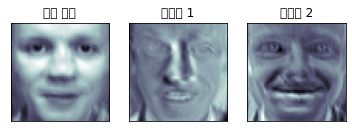

In [29]:
#이 얼굴들은 모두 평균값과 2개의 주성분 얼굴의 각기 다른 선형조합이다. 평균값과 2개의 주성분이 나타내는 얼굴을 이미지로 표시하면 다음과 같다. 
#주성분이 나타내는 얼굴을 **아이겐페이스(Eigen Face)**라고도 한다.

face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

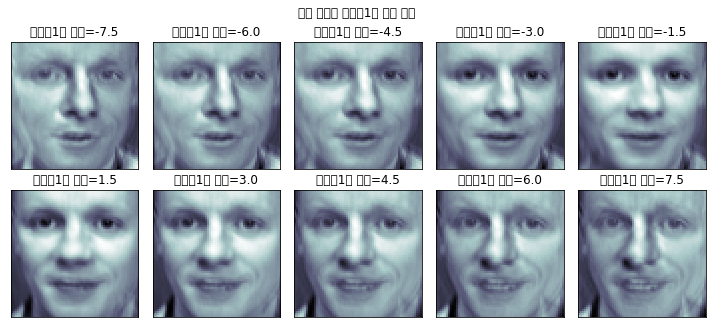

In [30]:
#이 그림만 보아서는 주성분 얼굴이 각각 어떤 의미를 가지는지 알기 어려우므로 평균 얼굴에 주성분 얼굴을 더한 모습을 같이 그려보자. 우선 평균 얼굴에 첫 번째 주성분을 더하면 다음과 같다.

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

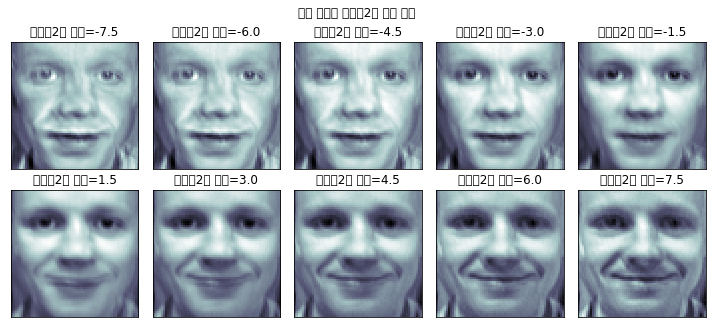

In [31]:
#이 이미지들로부터 첫 번째 주성분은 왼쪽과 오른쪽에서 바라본 얼굴 이미지의 차이를 나타낸다는 것을 알 수 있다. 두 번째 주성분을 평균 얼굴에 더하면 다음과 같다.
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

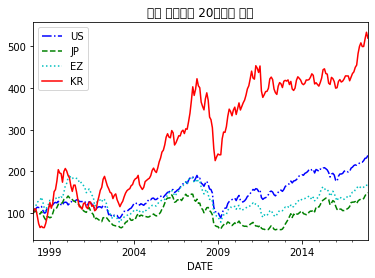

In [32]:
# 주식 가격의 PCA
#PCA는 다양한 분야에서 사용된다. 
#이번에는 금융분야에서 어떻게 쓰이는지 알아보자. 우선 미국(US), 일본(JP), 유럽(EZ), 한국(KR)의 과거 20년간 주가를 살펴보자.

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [33]:
#앞의 차트는 시작시점의 주가가 100이 되도록 크기를 조정하였다. 
#이 데이터로부터 연간 주식수익률 데이터를 구하면 다음처럼 20×4 크기의 특징행렬을 구할 수 있다.

df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

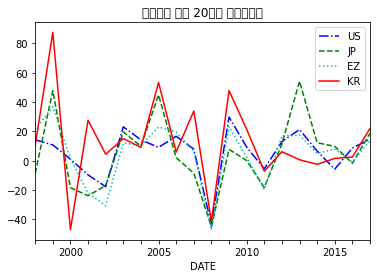

In [34]:
#이 연간 주식수익률 데이터를 그래프로 나타내면 다음과 같다. 
#붓꽃의 경우보다 (2차원에서 20차원으로) 차원은 증가했지만 각 표본이 가지는 측정 데이터 벡터의 모양(비율)이 비슷하다는 것을 알 수 있다. 
#붓꽃이 측정 데이터의 값을 결정하는 “크기”라는 잠재변수를 가지고 있는 것처럼 각 나라의 수익률은 “경제적 요인”이라고 하는 공통된 잠재변수에 의해서 결정되기 때문이다.
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [38]:
# PCA 분석을 통해 모든 나라의 주가 움직임 기저에 깔려있는 성분을 살펴보자.
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

#일단 세계주가의 공통요인은 평균값으로 구할 수 있다.
m = pca2.mean_
print('m = pca2.mean_:', m)

#그리고 나라별로 주가를 다르게 하는 요인은 주성분으로 구할 수 있다.
p1 = pca2.components_[0]
print('p1:', p1)

m = pca2.mean_: [  9.35024903  45.7748003  -15.71779759  -6.91967355 -15.20108361
  17.48765584  10.95568389  32.60609686  11.08048721   9.94632162
 -44.28095456  27.19782058   8.32897696 -12.63319273  11.86532327
  23.41445161   5.34108071   3.42888451   2.14468408  17.2613721 ]
p1: [-0.00270658  0.53651512 -0.39468113  0.41148841  0.23991661 -0.0315062
 -0.02577946  0.27841406 -0.07254126  0.28104992  0.03493189  0.23635416
  0.15424312  0.05797757 -0.0706337  -0.2543979  -0.09127243 -0.01132363
 -0.00264183  0.06046709]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

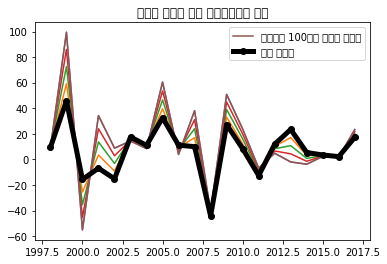

In [39]:
#이 두 가지 성분을 차트로 나타내보자. 
#평균주가로부터 주성분이 더해질수록 어떻게 주가의 형태가 바뀌는지 살펴보면 다음과 같다. 
#굵은 선으로 표시된 주가가 평균 주가이고 나머지 주가는 주성분이 점점 많이 추가됨에 따라 어떤 주가 형태로 변하는지를 표시한 것이다. 
#여기에서는 주성분의 모습을 잘 보기 위해 주성분을 과장하여 추가하였다.

xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [40]:
# 이 주성분이 가지는 의미를 살펴보기 위해 각 나라의 주성분 비중을 구한다.
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

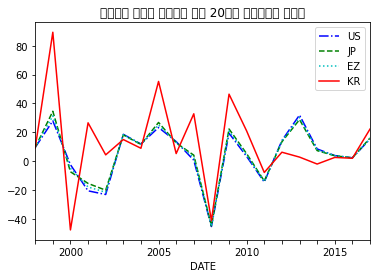

In [41]:
#한국은 주성분의 비중이 80이 넘고 나머지 국가들은 모두 주성분의 성분이 음수임을 알 수 있다. 
#또한 주성분을 이용하여 구한 근사 주가를 표시하면 다음과 같다.
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()

이 결과로부터 우리가 구한 주성분은 ‘미국, 일본, 유럽’이라는 데이터로부터 ‘한국’이라는 데이터로 변화시키는 요인, 즉 중진국 요인이라 부를 수 있는 성분이라는 것을 명확하게 알 수 있다.  